In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()

USE_SAMPLE = True
TRAIN_FACE = './sample/train_face.txt' if USE_SAMPLE else './data/train_face.txt'
TRAIN_USER_INTERACT = './sample/train_interaction.txt' if USE_SAMPLE else './data/train_interaction.txt'
TRAIN_TEXT = './sample/train_text.txt' if USE_SAMPLE else './data/train_text.txt'
TEST_FACE = './sample/test_face.txt' if USE_SAMPLE else './data/test_face.txt'
TEST_INTERACT = './sample/test_interaction.txt' if USE_SAMPLE else './data/test_interaction.txt'
TEST_TEXT = './sample/test_text.txt' if USE_SAMPLE else './data/test_text.txt'

feature_store_path = '../sample/features' if USE_SAMPLE else '../data/features'
col_feature_store_path = '../sample/features/columns' if USE_SAMPLE else './data/features/columns'

In [2]:
def plot_data_cut(df, col, n_bins=20):
    quartiles = pd.cut(df[col], n_bins)
    grouped = df.groupby(quartiles)
    
    plt.figure(figsize=(30,15)) 
    plt.xlabel(col)
    plt.ylabel('counts in ' + col)
    nums_of_col = grouped.size()
    nums_of_col.plot.bar()

In [4]:
users = pd.read_csv(os.path.join(feature_store_path, 'user_feature_sample.csv'), sep='\t')

In [5]:
users.head()

,user_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,...,woman_favor,man_cv_favor,woman_cv_favor,man_age_favor,woman_age_favor,man_yen_value_favor,woman_yen_value_favor,face_click_favor,non_face_click_favor,cover_length_favor
0,2,304,50,0,3,1015,6088,0.167463,0.000000,0.009868,...,0.220000,0.002134,0.023882,2.800000,3.870000,6.210000,10.770000,0.300000,0.700000,3.680000
1,3,550,76,0,0,957,12219,0.140308,0.000000,0.000000,...,0.592105,0.011608,0.066391,5.368421,11.736842,11.210526,35.179825,0.631579,0.368421,2.684211
2,4,399,23,0,0,373,8502,0.062449,0.000000,0.000000,...,0.217391,0.013809,0.011087,4.565217,4.847826,12.347826,9.217391,0.347826,0.652174,4.826087
3,7,1773,294,1,0,3068,30028,0.166339,0.000564,0.000000,...,0.125850,0.008632,0.008082,5.553571,2.541383,9.776644,6.180839,0.285714,0.714286,3.721088
4,9,81,26,0,0,645,1821,0.314741,0.000000,0.000000,...,0.153846,0.007823,0.019600,4.346154,3.653846,7.884615,10.192308,0.307692,0.692308,3.730769


In [7]:
photos = pd.read_csv(os.path.join(feature_store_path, 'photo_feature_sample.csv'), sep='\t')

In [8]:
photos.head()

,photo_id,exposure_num,clicked_ratio,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,...,man_avg_attr,woman_avg_attr,human_avg_attr,man_num_ratio,woman_num_ratio,cover_length,have_text_cate,key_words_num,avg_tfidf,have_face_cate
0,528031,52,0.246847,1.0,0.0,1.0,0.0,0.0506,0.0506,0.0,...,0.0,66.0,66.0,0.0,1.0,13,True,11,0.000024,True
1,3141045,189,0.320874,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,5,True,5,0.000017,False
2,6410672,157,0.206873,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,2,True,0,0.000011,False
3,6031965,8,0.158058,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,4,True,1,0.000016,False
4,492513,1,0.164285,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,False,0,0.000000,False


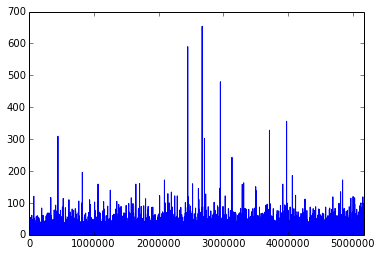

In [17]:
photos.key_words_num.plot()

In [18]:
photos.key_words_num.describe()

count    5.174532e+06
mean     1.654426e+00
std      2.924251e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      6.540000e+02
Name: key_words_num, dtype: float64

In [9]:
photos[photos['key_words_num']==0].shape

(695356, 22)

In [10]:
photos[photos['key_words_num']==1].shape

(117633, 22)

In [11]:
photos[photos['key_words_num']==2].shape

(132433, 22)

In [12]:
photos[photos['key_words_num']==3].shape

(114230, 22)

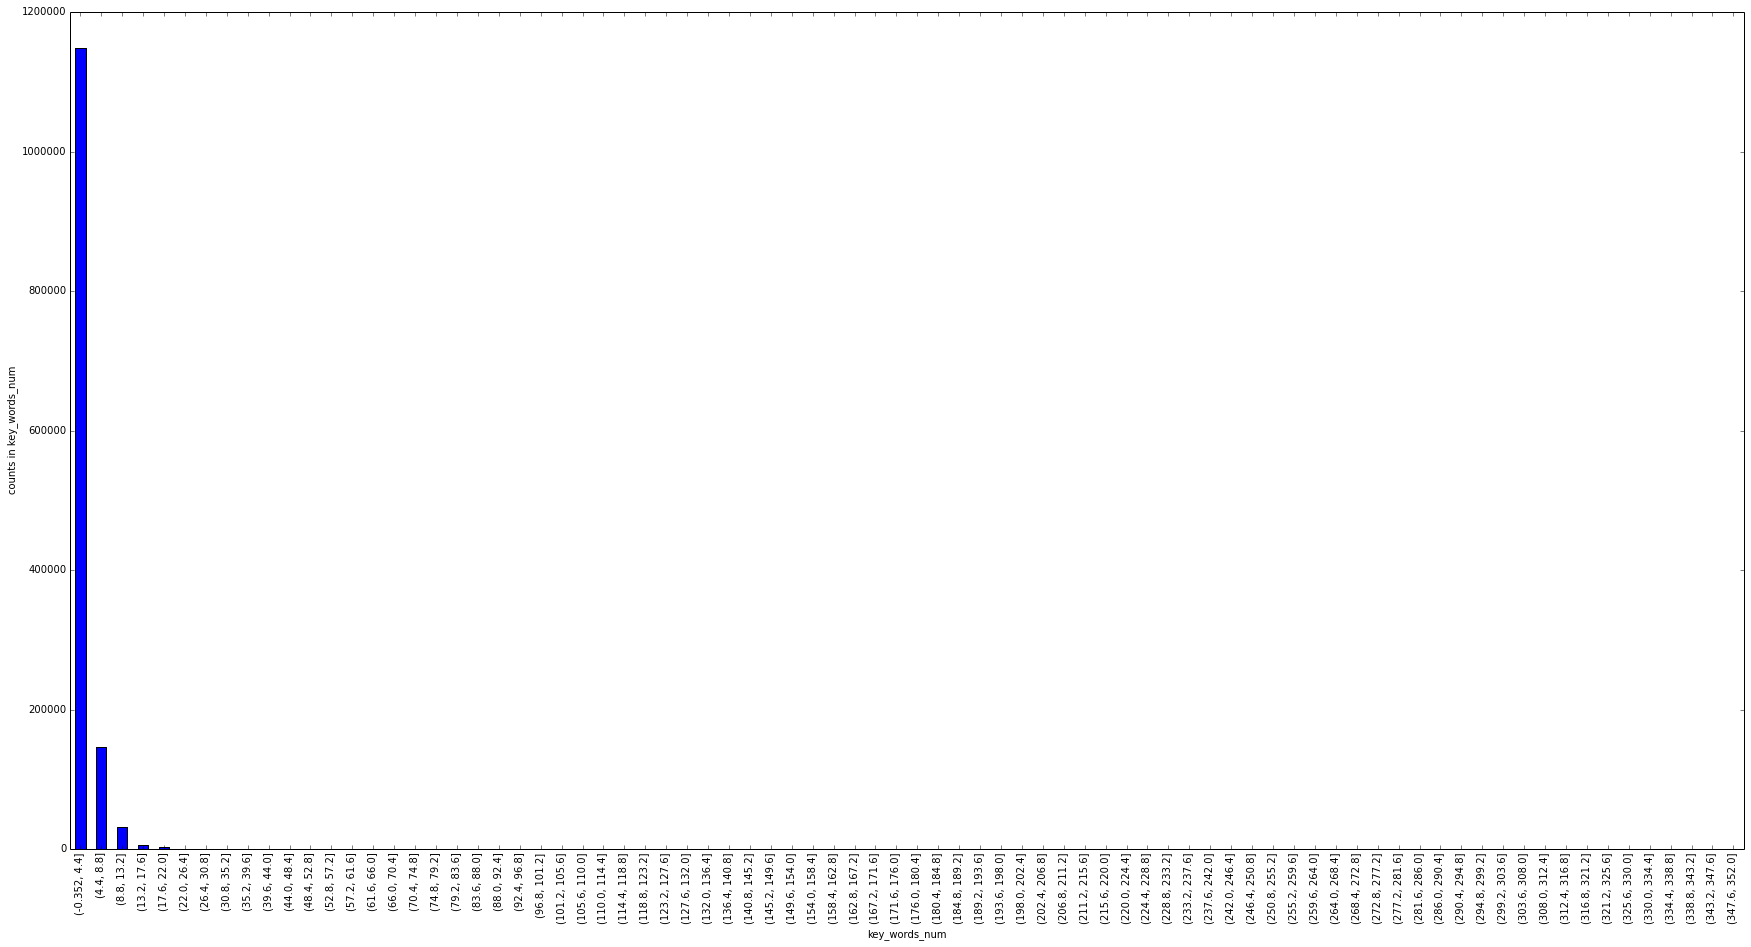

In [13]:
plot_data_cut(photos, 'key_words_num', 80)

In [14]:
photos.avg_tfidf.describe()

count    1.337176e+06
mean     8.336799e-06
std      8.581559e-06
min      0.000000e+00
25%      0.000000e+00
50%      7.935374e-06
75%      1.544833e-05
max      1.117753e-04
Name: avg_tfidf, dtype: float64

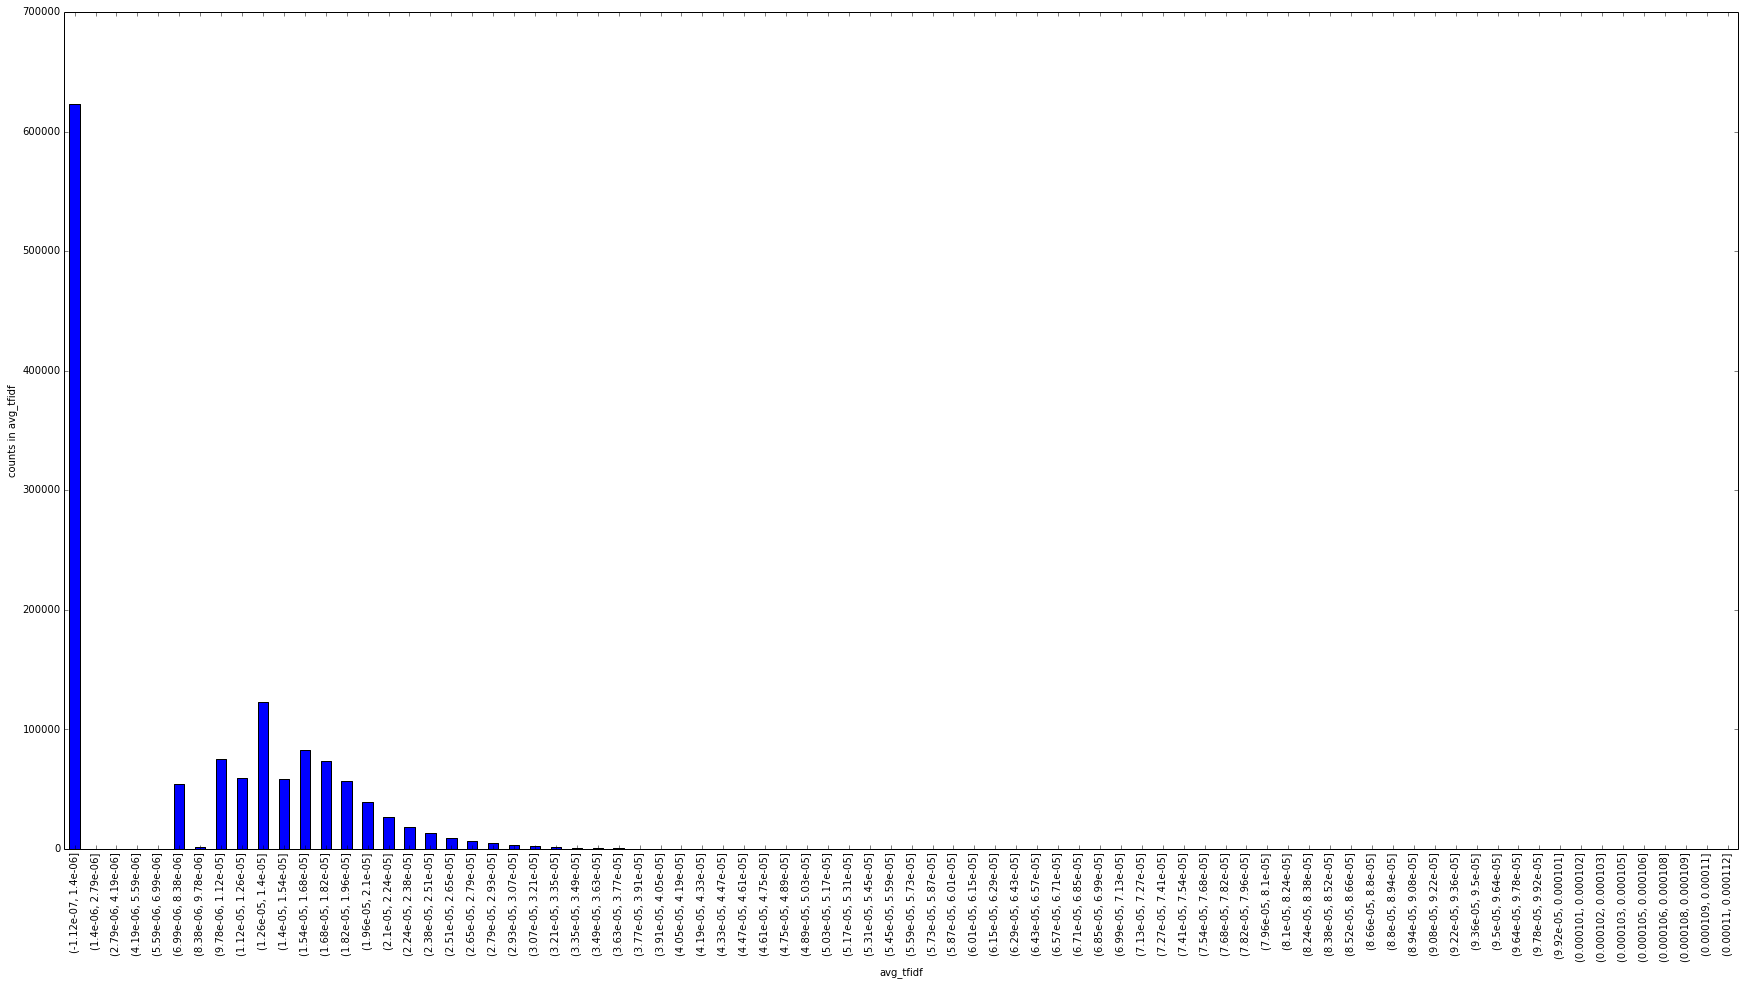

In [15]:
plot_data_cut(photos, 'avg_tfidf', 80)

In [16]:
train = pd.read_csv(os.path.join(feature_store_path, 'ensemble_feature_train_sample.csv'), sep='\t')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120901 entries, 0 to 3120900
Data columns (total 50 columns):
user_id                  int64
photo_id                 int64
browse_num               int64
click_num                int64
like_num                 int64
follow_num               int64
playing_sum              int64
duration_sum             int64
click_ratio              float64
like_ratio               float64
follow_ratio             float64
playing_ratio            float64
browse_time_diff         int64
click_freq               float64
browse_freq              float64
playing_freq             float64
man_favor                float64
woman_favor              float64
man_cv_favor             float64
woman_cv_favor           float64
man_age_favor            float64
woman_age_favor          float64
man_yen_value_favor      float64
woman_yen_value_favor    float64
face_click_favor         float64
non_face_click_favor     float64
cover_length_favor       float64
exposure_num  

In [17]:
train.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,woman_avg_attr,human_avg_attr,woman_num_ratio,man_num_ratio,cover_length,avg_tfidf,key_words_num,time,duration_time,click
0,2,528031,304,50,0,3,1015,6088,0.167463,0.0,...,66.0,66.0,1.0,0.0,13,0.000024,11,761073153303,16,0
1,2,3141045,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,5,0.000017,5,761073449279,10,0
2,2,6410672,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,2,0.000011,0,761072688657,13,0
3,2,6031965,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,4,0.000016,1,761079542559,11,0
4,2,492513,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0,0.000000,0,761071781792,11,0


In [29]:
test = pd.read_csv(os.path.join(feature_store_path, 'ensemble_feature_test_sample.csv'), sep='\t')

In [30]:
test.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,man_avg_attr,woman_avg_attr,human_avg_attr,woman_num_ratio,man_num_ratio,cover_length,avg_tfidf,key_words_num,time,duration_time
0,2,8493743,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,4,0.000016,2,761163868705,11
1,2,8676804,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,54.0,54.0,1.0,0.0,7,0.000020,5,761163868705,7
2,2,8389617,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,45.0,45.0,1.0,0.0,6,0.000018,5,761165874501,47
3,2,9080838,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,81.0,81.0,1.0,0.0,8,0.000020,7,761163868705,140
4,2,8962078,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.000023,9,761165874501,4


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489929 entries, 0 to 489928
Data columns (total 49 columns):
user_id                  489929 non-null int64
photo_id                 489929 non-null int64
browse_num               489929 non-null int64
click_num                489929 non-null int64
like_num                 489929 non-null int64
follow_num               489929 non-null int64
playing_sum              489929 non-null int64
duration_sum             489929 non-null int64
click_ratio              489929 non-null float64
like_ratio               489929 non-null float64
follow_ratio             489929 non-null float64
playing_ratio            489929 non-null float64
browse_time_diff         489929 non-null int64
click_freq               489929 non-null float64
browse_freq              489929 non-null float64
playing_freq             489929 non-null float64
man_favor                489929 non-null float64
woman_favor              489929 non-null float64
man_cv_favor             

In [198]:
time_train = pd.read_csv(os.path.join(col_feature_store_path, 'time_train.csv'), sep='\t')

In [199]:
time_test = pd.read_csv(os.path.join(col_feature_store_path, 'time_test.csv'), sep='\t')

In [200]:
time_cate_train = pd.read_csv(os.path.join(col_feature_store_path, 'time_cate_train.csv'), sep='\t')

In [201]:
time_cate_test = pd.read_csv(os.path.join(col_feature_store_path, 'time_cate_test.csv'), sep='\t')

In [202]:
period_click_ratio_test = pd.read_csv(os.path.join(col_feature_store_path, 'period_click_ratio_test.csv'), sep='\t')

In [203]:
period_click_ratio_train = pd.read_csv(os.path.join(col_feature_store_path, 'period_click_ratio_train.csv'), sep='\t')

In [204]:
period_click_ratio_test.head()

,user_id,photo_id,period_click_ratio
0,2,8493743,0.155963
1,2,8676804,0.155963
2,2,8389617,0.155963
3,2,9080838,0.155963
4,2,8962078,0.155963


In [205]:
import functools
merger = functools.partial(pd.merge, how='left', on=['photo_id', 'user_id'])


In [206]:
data_train = functools.reduce(merger, [period_click_ratio_train, time_cate_train, time_train])

In [207]:
data_train.head()

,user_id,photo_id,period_click_ratio,time_cate,time
0,2,528031,0.155963,2,761073153303
1,2,3141045,0.155963,2,761073449279
2,2,6410672,0.155963,2,761072688657
3,2,6031965,0.155963,2,761079542559
4,2,492513,0.155963,2,761071781792


In [208]:
data_test = functools.reduce(merger, [time_cate_test, time_test])

In [181]:
# data_train['avg_period_click_ratio'] = data_train['period_click_ratio'].groupby(data_train['user_id']).transform('mean')

In [182]:
# data_train[data_train['period_click_ratio']>=0.3].drop_duplicates(['user_id'])

In [209]:
users_click_ratio = pd.read_csv(os.path.join(col_feature_store_path, 'click_ratio_train.csv'), sep='\t').drop_duplicates(['user_id'])

In [210]:
users_click_ratio.head()

,user_id,photo_id,click_ratio
0,2,528031,0.167463
304,3,1659434,0.140308
854,4,3578378,0.062449
1253,7,2448170,0.166339
3026,9,3003380,0.314741


In [211]:
data_test = pd.merge(data_test, users_click_ratio, how='left', on=['user_id'])

In [212]:
data_test.head()

,user_id,photo_id_x,time_cate,time,photo_id_y,click_ratio
0,2,8493743,2,761163868705,528031,0.167463
1,2,8676804,2,761163868705,528031,0.167463
2,2,8389617,2,761165874501,528031,0.167463
3,2,9080838,2,761163868705,528031,0.167463
4,2,8962078,2,761165874501,528031,0.167463


In [213]:
data_test = pd.merge(data_test, data_train, how='left', on=['user_id', 'time_cate'])

In [214]:
data_test.head()

,user_id,photo_id_x,time_cate,time_x,photo_id_y,click_ratio,photo_id,period_click_ratio,time_y
0,2,8493743,2,761163868705,528031,0.167463,528031.0,0.155963,7.610732e+11
1,2,8493743,2,761163868705,528031,0.167463,3141045.0,0.155963,7.610734e+11
2,2,8493743,2,761163868705,528031,0.167463,6410672.0,0.155963,7.610727e+11
3,2,8493743,2,761163868705,528031,0.167463,6031965.0,0.155963,7.610795e+11
4,2,8493743,2,761163868705,528031,0.167463,492513.0,0.155963,7.610718e+11


In [218]:
data_test[np.isnan(data_test['period_click_ratio'])][['click_ratio', 'period_click_ratio']]

,click_ratio,period_click_ratio


In [216]:
data_test.loc[np.isnan(data_test['period_click_ratio']), ['period_click_ratio']] = data_test[np.isnan(data_test['period_click_ratio'])]['click_ratio']

In [217]:
data_test.head()

,user_id,photo_id_x,time_cate,time_x,photo_id_y,click_ratio,photo_id,period_click_ratio,time_y
0,2,8493743,2,761163868705,528031,0.167463,528031.0,0.155963,7.610732e+11
1,2,8493743,2,761163868705,528031,0.167463,3141045.0,0.155963,7.610734e+11
2,2,8493743,2,761163868705,528031,0.167463,6410672.0,0.155963,7.610727e+11
3,2,8493743,2,761163868705,528031,0.167463,6031965.0,0.155963,7.610795e+11
4,2,8493743,2,761163868705,528031,0.167463,492513.0,0.155963,7.610718e+11


In [111]:
train_time_sets = data_train.groupby(['user_id'])['time_cate'].unique().reset_index()

In [112]:
train_time_sets['time_cate'] = train_time_sets['time_cate'].apply(lambda x: set(x))

In [113]:
train_time_sets.head()

,user_id,time_cate
0,2,"{2, 5, 6}"
1,3,"{0, 1, 2, 4, 5, 6}"
2,4,"{1, 2, 4, 5}"
3,7,"{0, 1, 2, 4, 5, 6}"
4,9,"{1, 2, 3, 5, 6}"


In [118]:
test_time_sets = data_test.groupby(['user_id'])['time_cate'].unique().reset_index()

In [119]:
test_time_sets['time_cate'] = test_time_sets['time_cate'].apply(lambda x: set(x))

In [120]:
test_time_sets.head()

,user_id,time_cate
0,2,{2}
1,3,"{1, 2}"
2,4,{2}
3,7,"{0, 1, 2}"
4,9,{2}


In [132]:
count = 0
for diff in (test_time_sets['time_cate'] - train_time_sets['time_cate']):
    if len(diff) != 0:
#         print diff
        count += 1
count

5050

In [ ]:
data['']